In [7]:
import os
from data_loader.calib.intrinsic_extrinsic_loader import IntrinsicExtrinsicLoader
from tools.utils import *

In [8]:
def visualize_tf_tree(calib_path, platform, sequence_name):
  # Platform
  if platform == 'handheld':
    from cfg.dataset.cfg_handheld import dataset_sensor_frameid_dict
    from cfg.dataset.cfg_handheld import dataset_rostopic_msg_frameid_dict
  elif platform == 'ugv':
    from cfg.dataset.cfg_ugv import dataset_sensor_frameid_dict
    from cfg.dataset.cfg_ugv import dataset_rostopic_msg_frameid_dict
  elif platform == 'legged':
    from cfg.dataset.cfg_legged import dataset_sensor_frameid_dict
    from cfg.dataset.cfg_legged import dataset_rostopic_msg_frameid_dict
    if sequence_name == 'legged_grass00':
      dataset_sensor_frameid_dict, dataset_rostopic_msg_frameid_dict = \
        filter_sensor('event', dataset_sensor_frameid_dict, dataset_rostopic_msg_frameid_dict)
  elif platform =='vehicle':
    from cfg.dataset.cfg_vehicle import dataset_sensor_frameid_dict
    from cfg.dataset.cfg_vehicle import dataset_rostopic_msg_frameid_dict

  ##### Set up the sensor configuration
  int_ext_loader = IntrinsicExtrinsicLoader(is_print=False)
  int_ext_loader.load_calibration(calib_path=calib_path, sensor_frameid_dict=dataset_sensor_frameid_dict)
  print('Finish loading parameters')

  ##### Visualize TF-tree
  int_ext_loader.tf_graph.is_print = True
  int_ext_loader.tf_graph.visualize_graph()

  ##### Publish TF-tree to ROS
  int_ext_loader.tf_graph.is_print = False
  int_ext_loader.tf_graph.publish_graph()


Start processing platform: handheld sequence: handheld_escalator00
Finish loading parameters
['body_imu', 'ouster00']
['body_imu', 'ouster00', 'ouster00_imu']
['body_imu', 'event_cam00']
['body_imu', 'event_cam01']
['body_imu', 'frame_cam00']
['body_imu', 'frame_cam01']


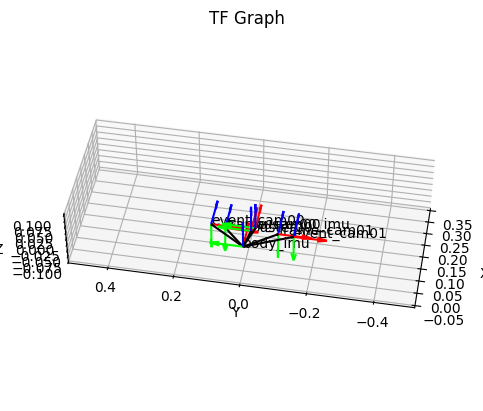

In [9]:
from cfg.dataset.cfg_sequence import dataset_sequence_calib_used_dict

for sequence_name in dataset_sequence_calib_used_dict.keys():
  platform = dataset_sequence_calib_used_dict[sequence_name][0]
  calib_folder = dataset_sequence_calib_used_dict[sequence_name][1]
  used = dataset_sequence_calib_used_dict[sequence_name][2]
  if used:
    print('Start processing platform: {} sequence: {}'.format(platform, sequence_name))
    dataset_path = '/Rocket_ssd/dataset/FusionPortable_dataset_develop/sensor_data/data_refined'
    calib_path = os.path.join(dataset_path, '../../calibration_files', calib_folder, 'calib')
    visualize_tf_tree(calib_path, platform, sequence_name)